In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import glob
import os

from sklearn.preprocessing import StandardScaler
import sklearn.decomposition
from sklearn.decomposition import PCA

In [2]:
# use glob to get all the csv files in the folder
date_array = ['201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905']
all_data = pd.DataFrame()

#loop over all folders for each month
for date in date_array: 
    path = 'H:\Masters Project\Data First of Month\\' + date
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    print(path)
    
    #loop over every csv file in each folder
    for f in csv_files:
        # read the csv file
        df = pd.read_csv(f)
        month = date[4:]
        df['Month'] = month

        all_data = all_data.append(df)
        
print('All csv files loaded to dataframe')
    

H:\Masters Project\Data First of Month\201809
H:\Masters Project\Data First of Month\201810
H:\Masters Project\Data First of Month\201811
H:\Masters Project\Data First of Month\201812
H:\Masters Project\Data First of Month\201901
H:\Masters Project\Data First of Month\201902
H:\Masters Project\Data First of Month\201903
H:\Masters Project\Data First of Month\201904
H:\Masters Project\Data First of Month\201905
All csv files loaded to dataframe


In [22]:
all_data.head()

,25.1188643150958,31.6227766016838,39.8107170553497,50.1187233627272,63.0957344480193,79.4328234724282,100,125.892541179417,158.489319246111,199.526231496888,...,3981.07170553498,5011.87233627273,6309.57344480194,7943.28234724283,10000,12589.2541179417,15848.9319246112,19952.6231496888,25118.8643150958,Month
0,78.911975,72.918925,72.521267,68.990563,65.541214,62.464181,58.425453,59.209198,57.368192,57.345596,...,57.083304,56.704392,56.518996,56.805633,57.339605,58.129422,58.999640,60.247402,57.509859,09
1,74.139115,77.236610,72.131595,66.933867,64.371431,64.939339,58.156749,59.103741,56.607435,54.238442,...,58.864675,57.192771,58.130950,59.046354,57.756168,58.037998,58.949128,60.197864,57.276134,09
2,77.815994,75.079413,73.999438,68.067517,61.820354,63.054462,58.840162,60.092387,57.500899,55.781989,...,56.715473,56.579801,56.033481,56.697943,57.142603,57.863385,58.618502,60.177939,57.483994,09
3,76.420207,76.998283,70.780390,67.961152,64.470419,64.605585,61.081087,61.587194,60.827010,59.387622,...,57.690355,57.090621,56.498555,57.120659,57.568537,57.669828,58.552092,60.094007,57.495422,09
4,77.252353,75.873380,70.401237,70.021599,66.358562,64.832790,59.883667,60.907694,59.927656,58.278451,...,56.595677,57.292375,56.395984,56.517778,57.063599,57.816048,58.673505,60.442667,57.447966,09


In [4]:
all_data.drop(columns=df.columns[0], inplace=True, axis=1)   # remove time axis formatted from PAMGuide
all_data.replace([np.inf, -np.inf], np.nan, inplace=True)    # replace inf values with nan 
#all_data.dropna(inplace=True)                                # remove nan values
all_data.reset_index(inplace=True)                           #reset index
all_data.drop(columns='index', inplace=True, axis=1)         #remove old index

Time is equal to index divided by two as two measurements per second due to 1 second intervals and 50% overlap. 
Not that the time is not continuous as measurements are taken from the first day of the month. 

In [7]:
def remove_nans(df):
    '''
    Removes any rows containing nan values and two rows either side of each of 
    these rows.
    '''
    m = df.isna().any(axis=1)
    return df[~(m | m.shift(fill_value=False) | m.shift(-1, fill_value=False) | m.shift(-2, fill_value=False))]

In [8]:
#clean_data = remove_dodgy_data(all_data.drop('Month', axis=1))
clean_data = remove_nans(all_data)

In [23]:
clean_data.head()

,25.1188643150958,31.6227766016838,39.8107170553497,50.1187233627272,63.0957344480193,79.4328234724282,100,125.892541179417,158.489319246111,199.526231496888,...,3162.27766016838,3981.07170553498,5011.87233627273,6309.57344480194,7943.28234724283,10000,12589.2541179417,15848.9319246112,19952.6231496888,25118.8643150958
0,78.911975,72.918925,72.521267,68.990563,65.541214,62.464181,58.425453,59.209198,57.368192,57.345596,...,57.623309,57.083304,56.704392,56.518996,56.805633,57.339605,58.129422,58.999640,60.247402,57.509859
1,74.139115,77.236610,72.131595,66.933867,64.371431,64.939339,58.156749,59.103741,56.607435,54.238442,...,59.407422,58.864675,57.192771,58.130950,59.046354,57.756168,58.037998,58.949128,60.197864,57.276134
2,77.815994,75.079413,73.999438,68.067517,61.820354,63.054462,58.840162,60.092387,57.500899,55.781989,...,56.884854,56.715473,56.579801,56.033481,56.697943,57.142603,57.863385,58.618502,60.177939,57.483994
3,76.420207,76.998283,70.780390,67.961152,64.470419,64.605585,61.081087,61.587194,60.827010,59.387622,...,57.489022,57.690355,57.090621,56.498555,57.120659,57.568537,57.669828,58.552092,60.094007,57.495422
4,77.252353,75.873380,70.401237,70.021599,66.358562,64.832790,59.883667,60.907694,59.927656,58.278451,...,56.721158,56.595677,57.292375,56.395984,56.517778,57.063599,57.816048,58.673505,60.442667,57.447966


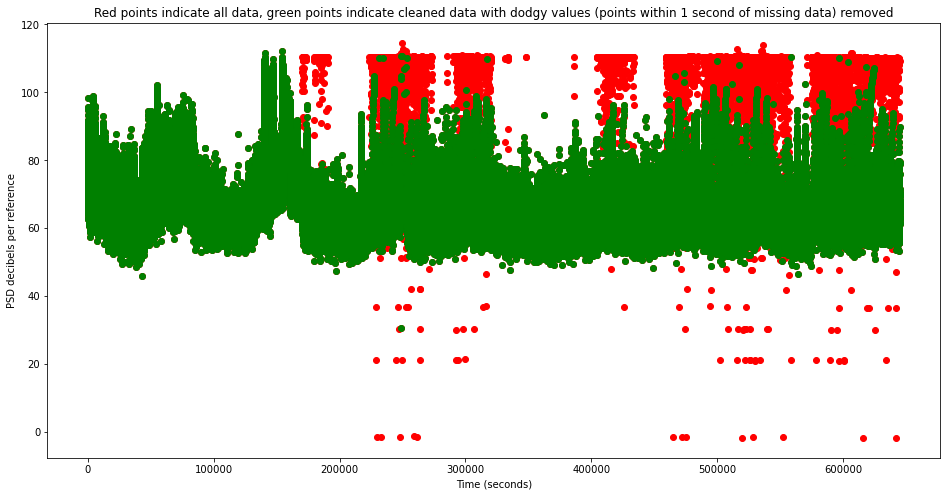

In [10]:
time = all_data.index/2
new_time = clean_data.index/2

plt.figure(figsize=(16, 8))
plt.xlabel('Time (seconds)')
plt.ylabel('PSD decibels per reference')

ax1 = plt.scatter(x=time, y=all_data['25.1188643150958'], color='r', label='All collected data')    
ax2 = plt.scatter(x=new_time, y=clean_data['25.1188643150958'], color='g', label='Removed everything within 1 second of missing data/inf value')  
plt.title('Red points indicate all data, green points indicate cleaned data with dodgy values (points within 1 second of missing data) removed')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


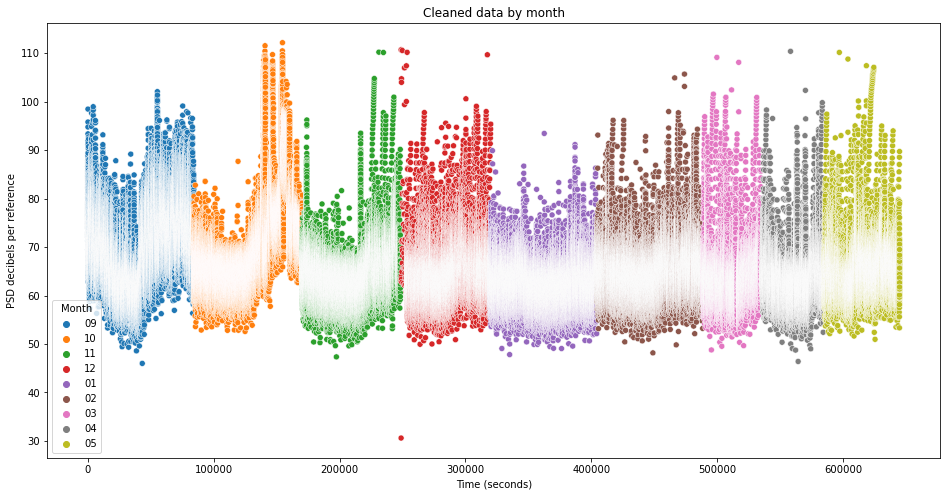

In [11]:
new_time = clean_data.index/2

plt.figure(figsize=(16, 8))
plt.xlabel('Time (seconds)')
plt.ylabel('PSD decibels per reference')

sns.scatterplot(x=new_time, y=clean_data['25.1188643150958'], hue=clean_data['Month'])  
plt.title('Cleaned data by month')
plt.show()

From the above plot we can see that there was no data available for the month of December and the spring months had regular periods of missing data.

PRINCIPAL COMPONENT ANALYSIS

In [12]:
#scale the data
scaler = StandardScaler()
scaler.fit(clean_data.drop('Month', axis=1))
scaled_data = scaler.transform(clean_data.drop('Month', axis=1))

#Principal Component Analysis 
number_of_components = 3
pca = PCA(n_components=number_of_components)
pca.fit(scaled_data)
pca_comps = pca.transform(scaled_data)

#principal components 
PC1 = pca_comps[:,0]
PC2 = pca_comps[:,1]
PC3 = pca_comps[:,2]

#print the explained variance of each component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Total explained variation: {}'.format(sum(pca.explained_variance_ratio_)))


Explained variation per principal component: [0.75942444 0.12450368 0.03298659]
Total explained variation: 0.9169147197717122


In [13]:
colours = clean_data['Month'].to_numpy()
colours = colours.astype(float)
colours

array([9., 9., 9., ..., 5., 5., 5.])

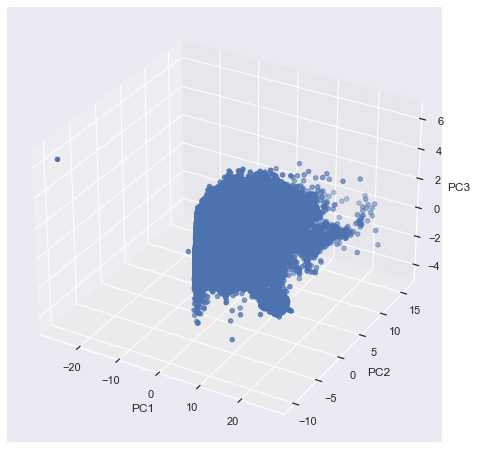

In [14]:
#3D plot of principal components 
sns.set(style = "darkgrid")
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.scatter(PC1, PC2, PC3)
plt.show()

<ipython-input-15-85ff2b4f7f74>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


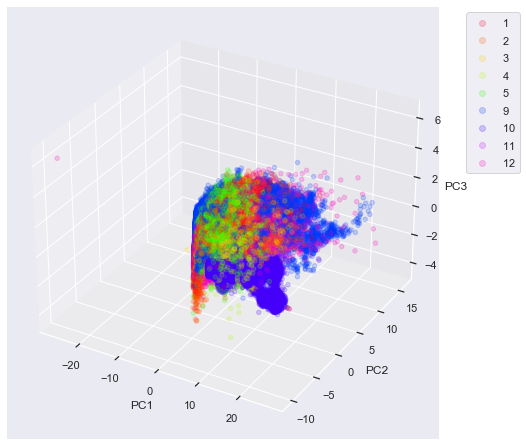

In [15]:
import re, seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import cm


# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
#cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(PC1, PC2, PC3, c=colours, marker='o', cmap=cm.gist_rainbow, alpha=0.2)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)


In [16]:
clean_data.drop('Month', axis=1, inplace=True)

#create dataframe to show correlations of components to original frequencies to visualise PC's
df_feature_importance = pd.DataFrame(pca.components_).transpose()
df_feature_importance.rename(columns={0:'PC1', 1:'PC2', 2:'PC3'}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
#create column of frequencies as type float and add to feature importance dataframe
freq = clean_data.columns.to_numpy()
freq = freq.astype(float)
df_feature_importance['Frequency'] = freq
df_feature_importance.set_index('Frequency', inplace=True)
df_feature_importance.head()

,PC1,PC2,PC3
Frequency,,,
25.118864,0.112586,-0.049131,0.032692
31.622777,0.157404,-0.148027,-0.292547
39.810717,0.161746,-0.168325,-0.299985
50.118723,0.162383,-0.207512,-0.330197
63.095734,0.172367,-0.194232,-0.287026


(0.0, 500.0)

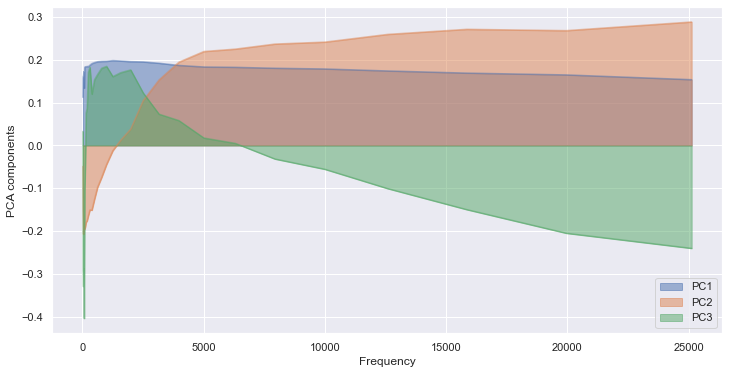

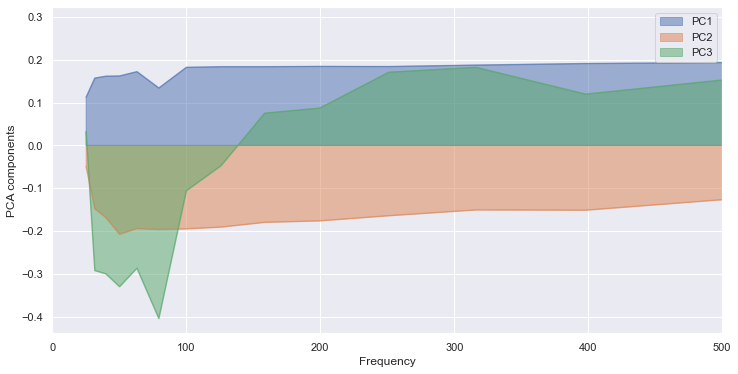

In [18]:
#convert frequencies to float
#df_feature_importance.reset_index(inplace=True)  
#df_feature_importance['index'] = df_feature_importance['index'].astype(float)  
#df_feature_importance.set_index('index', inplace=True)

#plot feature importance against frequency for each principal component
df_feature_importance.plot.area(stacked=False, figsize=(12,6))
plt.xlabel('Frequency')
plt.ylabel('PCA components')

#plot feature importance against frequency under 1kHz for each principal component
df_feature_importance.plot.area(stacked=False, figsize=(12,6))
plt.xlabel('Frequency')
plt.ylabel('PCA components')
plt.xlim(0, 500)